Code for cleaning data from Harham.com

In [2]:
import requests, bs4, time
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
from datetime import date
from langdetect import detect
import os
import re
import matplotlib.pyplot as plt
import cleaning_funcs_harnham as cf


In [4]:
os.getcwd()
#os.chdir('Cleaning')

'C:\\Users\\lundr\\DSJ\\DataScienceJobs\\Cleaning'

In [5]:
files = os.listdir('C:/Users/lundr/DataScienceJobs/data/harnham_raw_pickles/')
files = ['RAW_harnham_usa_2019-12-03.pkl','RAW_harnham_ger_2019-12-03.pkl','RAW_harnham_ger_2019-12-13.pkl','RAW_harnham_usa_2019-12-13.pkl']
files
# if there are checkpoints in the folder these will need t be deleted

['RAW_harnham_usa_2019-12-03.pkl',
 'RAW_harnham_ger_2019-12-03.pkl',
 'RAW_harnham_ger_2019-12-13.pkl',
 'RAW_harnham_usa_2019-12-13.pkl']

In [6]:
import pickle
info = pd.DataFrame(columns = ["job_ref","job_title","location","salary","description","type","country","extraction_date","url"])

import os

for i in files:
    
    read_in = pd.read_pickle("C:/Users/lundr/DataScienceJobs/data/harnham_raw_pickles/"+i)
    read_in['salary_low'], read_in['salary_high'], read_in['salary_type'] = cf.create_split_salary_range(read_in['salary'])
    if read_in['country'][0] == 'UK':
        read_in['salary_low'] =cf.clean_salary(read_in['salary_low'],"£")
        read_in['salary_high'] =cf.clean_salary(read_in['salary_high'],"£")
    elif read_in['country'][0] == 'USA':   
        read_in['salary_low'] = cf.clean_salary(read_in['salary_low'],"$")
        read_in['salary_high'] = cf.clean_salary(read_in['salary_high'],"$")
    elif read_in['country'][0] == 'GER':   
        read_in['salary_low'] = cf.clean_salary(read_in['salary_low'],"€")
        read_in['salary_high'] = cf.clean_salary(read_in['salary_high'],"€")
    else:
        pass
    info = pd.concat([info,read_in],ignore_index = True, axis = 0, sort=True)

In [9]:
info['Region']

0           New York
1         California
2           New York
3           New York
4      Massachusetts
           ...      
638         New York
639         New York
640       California
641         New York
642    Massachusetts
Name: Region, Length: 643, dtype: object

In [7]:
#drop rows with identical descriptions
info = info.drop_duplicates(['description'])

#reset index after dropping duplicated
info.reset_index(inplace=True)

In [8]:
# run data cleaning functions
info['description']=cf.remove_duped_info(info['description'],[info['job_title'],info['location']])
info['description']=cf.clean_column(info['description'])
info['location']=cf.clean_column(info['location'])
info['ref_code'] = cf.clean_jobref(info['job_ref'])
info['Region'] = cf.check_locations(info['location'],info['country'])
info['salary_type']=cf.clean_salary_type(info['salary_type'])
country_dict = {'UK':'UK','USA':'USA','GER':'Germany','Germany':'Germany'}
info['country']=info['country'].map(country_dict)


C:\Users\lundr\DSJ\DataScienceJobs\Cleaning\cleaning_funcs_harnham.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[j] = l.replace(l_2," ")
C:\Users\lundr\DSJ\DataScienceJobs\Cleaning\cleaning_funcs_harnham.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if type(a[i])!="str":a[i]=str(a[i])
C:\Users\lundr\DSJ\DataScienceJobs\Cleaning\cleaning_funcs_harnham.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]=(pattern.sub(la

In [10]:
info['Region'] = [x.split(",")[0] for x in info['Region']]

In [11]:


corrections = {"Bromley Kent" : "South East",
               "South West England" : "South West",
               "Rochester New York" : "NY",
               "Toronto  Ontario" : "Canada",
               "Augsburg  Bayern" : "Bayern",
               "District of Columbia" : "WA",
               "Perth & Kinross" : "Scotland"
               
    
}
#Bromley Kent = South East
# South East London London = 'London'
#England,South West,South West = South West
#"Rochester New York" = "NY"
# Toronto Ontario = CAN [Country] *Region = Canada
#augsberg bayern = 
#District of colombia = 
#Perth & kinross = Scotland
     
     
#for i in range(len(info['location'])):
for i in range(len(info['location'])):
    if info['location'][i].lstrip().rstrip() in corrections.keys():
        info['Region'][i] = corrections[info['location'][i].lstrip().rstrip()]

In [12]:
#add correct column headings and new columns

import numpy as np
import datetime

#info.columns = ['ref_code', 'job_title', 'location', 'salary', 'description', 'jobtype','url',
#       'salary_low', 'salary_high']

#company: Company or recruiter advertising the job
info['company'] = 'Harnham'


#duration: How long the job had been advertised for at time of scraping
info['posted_date'] = np.nan



In [13]:

info['salary_low'][131]  = 110000
info['salary_high'][131]  = 130000

info['salary_low'][306]  = 100000
info['salary_high'][306]  = 11000

info['salary_low'][360]  = 165000
info['salary_high'][360]  = 195000

info['salary_low'][365]  = 150000
info['salary_high'][365]  = 170000

info['salary_low'][407]  = 110000
info['salary_high'][407]  = 110000

info['salary_low'][432]  = 160000
info['salary_high'][432]  = 220000

info['salary_low'][475]  = 60000
info['salary_high'][475]  = 75000

info['salary_low'][477]  = 55000
info['salary_high'][477]  = 65000

info['salary_low'][582]  = 170000
info['salary_high'][582]  = 190000

info[(info['salary_type']=='yearly') & (info['salary_low'] < 20000)]


C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gu

,index,country,description,extraction_date,job_ref,job_title,location,salary,salary_high,salary_low,salary_type,type,url,ref_code,Region,company,posted_date


In [14]:
# check for salary anomalies and manually correct
info[info['salary_high']/info['salary_low']>3]

,index,country,description,extraction_date,job_ref,job_title,location,salary,salary_high,salary_low,salary_type,type,url,ref_code,Region,company,posted_date
396,404,USA,"' minneapolis$220,000 ', ""a global automotive...",2019-12-03,[23423/SN],VP of Engineering,"'Minneapolis, Minnesota'",US$24385 - US$268235 per annum + Benefits,268235.0,24385.0,yearly,Permanent,/job/vp-of-engineering-in-minneapolis-minnesot...,23423/SN,Minnesota,Harnham,NaN
457,466,Germany,'lead data scientist (m/f/d)90.000 - 100.000€...,2019-12-03,[67268/TS],4MAT,"'Münster, Nordrhein-Westfalen'",€90000 - €1000000 per annum,1000000.0,90000.0,yearly,Permanent,https://www.harnham.com/job/lead-data-scientis...,67268/TS,Nordrhein-Westfalen,Harnham,NaN
634,1060,USA,'this company is looking for a very strong en...,2019-12-13,[EMC],4MAT,"'San Francisco, California'",US$25604 - US$231657 per annum,231657.0,25604.0,yearly,Permanent,/job/engineering-manager-in-san-francisco-cali...,EMC,California,Harnham,NaN


In [15]:

#correct the mistake
#info.loc[info['salary_high']==max(info['salary_high']),'salary_high']=65000
info['salary_low'][396]  = 220000
info['salary_high'][396]  = 220000

info['salary_low'][457]  = 90000
info['salary_high'][457]  = 100000

info['salary_low'][634]  = 231657
info['salary_high'][634]  = 25604


info['salary_average'] = (info['salary_low']+info['salary_high'])/2

C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

Plot data

In [16]:
GBP = 1.14
USD  = 0.9

# currency conversion
info['salary_low_euros'] = info['salary_low']
info['salary_high_euros'] = info['salary_high'] 
info['salary_average_euros'] = info['salary_average'] 
#

currency = {'UK':1.14, 'Germany':1, 'USA':0.90}
info['salary_low_euros'] = [currency[info['country'][x]]*info['salary_low'][x] for x in range(len(info['salary_low']))]
info['salary_high_euros'] = [currency[info['country'][x]]*info['salary_high'][x] for x in range(len(info['salary_high']))]
info['salary_average'] = [currency[info['country'][x]]*info['salary_average'][x] for x in range(len(info['salary_average']))]




(array([ 21.,  25., 139., 118., 113., 147.,  40.,  23.,  12.,   5.]),
 array([3.0000e+02, 3.2020e+04, 6.3740e+04, 9.5460e+04, 1.2718e+05,
        1.5890e+05, 1.9062e+05, 2.2234e+05, 2.5406e+05, 2.8578e+05,
        3.1750e+05]),
 <a list of 10 Patch objects>)

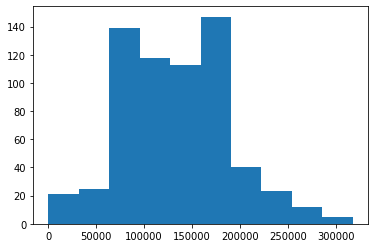

In [17]:
#plt.hist(info['salary_average'][info['jobtype']!='Contract'])
plt.hist(info['salary_average_euros'])

In [18]:
table = info[info['salary_type']=='yearly'].groupby(by='Region').agg({'salary_average_euros' : ['count','mean','median','min','max']}).sort_values(by = ('salary_average_euros', 'mean'))

In [19]:
table.applymap(int)

salary_average_euros                                
                                   count    mean  median     min     max
Region                                                                  
Baden-Württemberg                      6   66916   63750   56500   80000
Hessen                                 3   73333   75000   65000   80000
Berlin                                44   73382   70000   42500  105000
Nordrhein-Westfalen                   21   74642   75000   45000  110000
Sachsen                                1   75000   75000   75000   75000
Hamburg                               20   75750   73750   45000  120000
Bayern                                36   77708   76250   45000  120000
Virginia                               4   94375   95000   82500  105000
Maryland                               3  105000  105000  100000  110000
Florida                                2  108750  108750   97500  120000
Wisconsin                              1  110000  110000  110000  110000
                                      17  122169  106684   70000  213368
Washington                             7  141010  135000  112500  175000
New York                             165  145281  134117   52500  317500
Massachusetts                        101  146100  150000   70000  213368
North Carolina                         3  146666  120000  110000  210000
New Jersey                             2  151250  151250  150000  152500
Tennessee                              2  160000  160000  160000  160000
Oregon                                 9  169955  175000   75000  255000
California                           150  170897  173750   60000  304812
Texas                                  3  179732  210000   73154  256042
Utah                                   3  180000  190000  160000  190000
Illinois                              10  181443  172219  125000  240000
Ohio                                   1  192031  192031  192031  192031
Minnesota                              8  222479  215000  190000  256042

In [20]:
for x in range(info.shape[0]):
    for y in range(info.shape[1]):
        if info.iloc[x,y] =='None' or info.iloc[x,y] =='Nothing_found':
            info.iloc[x,y] = np.nan

In [22]:
info.Region.unique()

array(['New York', 'California', 'Massachusetts', 'North Carolina', '',
       'Maryland', 'New Jersey', 'Washington', 'Oregon', 'Illinois',
       'Utah', 'Tennessee', 'Wisconsin', 'Texas', 'Minnesota', 'Ohio',
       'Nordrhein-Westfalen', 'Hamburg', 'Bayern', 'Sachsen', 'Berlin',
       'Hessen', 'Baden-Württemberg', 'Florida', 'Virginia'], dtype=object)

In [23]:
# job_title, company, description, salary, salary_low, salary_high, salary_average,salary_low_euros, salary_high_euros, salary_average_euros,  location, jobtype,posted_date, extraction_date, country, region
info['jobtype'] = info['type']
info['currency'] = info['country']
info['currency'] = info['currency'].map({"UK":"£","Germany":"€","USA":"$"})
info['region'] = info['Region']
info['language'] = info.description.apply(detect)
data_to_database = info[['job_title','url','ref_code', 'company', 'description', 'salary', 'salary_low', 'salary_high', 'currency','salary_average','salary_low_euros', 'salary_high_euros', 'salary_average_euros', 'salary_type', 'location', 'jobtype','posted_date', 'extraction_date', 'country', 'region','language']]

In [24]:
#pickle out the data for good measure
data_to_database.to_pickle("C:/Users/lundr/DataScienceJobs/data/harnham_all_CLEAN_15-11-19.pkl")

In [25]:
os.getcwd()

'C:\\Users\\lundr\\DSJ\\DataScienceJobs\\Cleaning'

In [35]:
#connect to the database
import os 
os.getcwd()
#os.chdir('..')

PASSWORD = pd.read_pickle('C:/Users/lundr/DataScienceJobs/data/SQL_access.pkl')

import SQL.db_upload as db

db.db_upload(PASSWORD, data_to_database)


Landing page is currently empty.

Uploading data to landing page...
Done!


In [33]:
info['region'].unique()

array(['New York', 'California', 'Massachusetts', 'North Carolina', '',
       'Maryland', 'New Jersey', 'Washington', 'Oregon', 'Illinois',
       'Utah', 'Tennessee', 'Wisconsin', 'Texas', 'Minnesota', 'Ohio',
       'Nordrhein-Westfalen', 'Hamburg', 'Bayern', 'Sachsen', 'Berlin',
       'Hessen', 'Baden-Württemberg', 'Florida', 'Virginia'], dtype=object)

In [34]:
info.head()

,index,country,description,extraction_date,job_ref,job_title,location,salary,salary_high,salary_low,...,company,posted_date,salary_average,salary_low_euros,salary_high_euros,salary_average_euros,jobtype,currency,region,language
0,0,USA,"' ', ' the company', "" by combining advanced ...",2019-12-03,[125479082345],Senior Data Scientist - MULTIPLE ROLES: Statis...,'New York',US$150000 - US$175000 per year + EQ,175000.0,150000.0,...,Harnham,NaN,146250.0,135000.0,157500.0,162500.0,Permanent,$,New York,en
1,1,USA,"' ', 'as a principal data scientist, you will...",2019-12-03,[18265RS],THE COMPANY:,"'Santa Clara, California'",US$180000 - US$200000 per annum,200000.0,180000.0,...,Harnham,NaN,171000.0,162000.0,180000.0,190000.0,Permanent,$,California,en
2,2,USA,"' ', 'harnham are partnered exclusively with ...",2019-12-03,[40739 VACTJ],THE COMPANY,'New York',US$140000 - US$160000 per annum + Bonus + Bene...,160000.0,140000.0,...,Harnham,NaN,135000.0,126000.0,144000.0,150000.0,Permanent,$,New York,en
3,3,USA,"' new york, new york$140,000-170,000 base sal...",2019-12-03,[69271 VACTJ],Machine Learning Engineer,'New York',US$140000 - US$170000 per annum + Equity + Ben...,170000.0,140000.0,...,Harnham,NaN,139500.0,126000.0,153000.0,155000.0,Permanent,$,New York,en
4,4,USA,"' ', 'boston, ma', 'usd $170000', ' ', 'a rev...",2019-12-03,[362362],TV Data Scientist,"'Boston, Massachusetts'",US$150000 - US$170000 per year,170000.0,150000.0,...,Harnham,NaN,144000.0,135000.0,153000.0,160000.0,Permanent,$,Massachusetts,en
